In [4]:
import sys
sys.path.append("/cmlscratch/nehamk/segment-anything")
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry
import numpy as np
import torch

def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)
    polygons = []
    color = []
    for ann in sorted_anns:
        m = ann['segmentation']
        img = np.ones((m.shape[0], m.shape[1], 3))
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
        ax.imshow(np.dstack((img, m*0.35)))

    
sam = sam_model_registry['vit_b'](checkpoint='sam_vit_b_01ec64.pth')


In [20]:
import matplotlib.pyplot as plt
import cv2
from torchvision import transforms

image = cv2.imread('person_with_coffee.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# tr = transforms.Compose(
#             [
#                 transforms.ToTensor(),  
#                 transforms.Resize((1024, 1024)), 
#             ]
#         )

# im = tr(image)

In [21]:
mask_generator = SamAutomaticMaskGenerator(sam, 
    points_per_side=32,
    pred_iou_thresh=0.9,
    # stability_score_thresh=0.92,
    # crop_n_layers=1,
    # crop_n_points_downscale_factor=2,
    min_mask_region_area=50000
)

masks = mask_generator.generate(image)



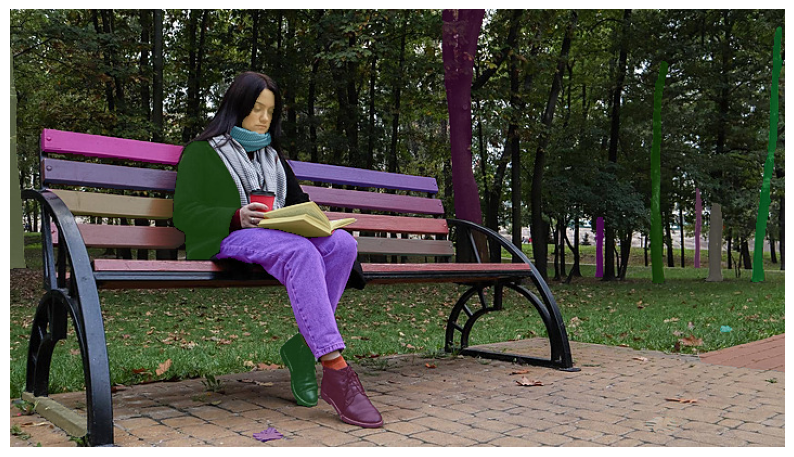

In [22]:
plt.figure(figsize=(10,10))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show() 

In [3]:
from groundingdino.util.inference import load_model, load_image, predict, annotate
import cv2

model = load_model("/cmlscratch/nehamk/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py", "/cmlscratch/nehamk/GroundingDINO/weights/groundingdino_swint_ogc.pth")
IMAGE_PATH = "person_with_coffee.jpeg"
TEXT_PROMPT = "woman . book . park bench ."
BOX_TRESHOLD = 0
TEXT_TRESHOLD = 0.25

image_source, image = load_image(IMAGE_PATH)

boxes, logits, phrases = predict(
    model=model,
    image=image,
    caption=TEXT_PROMPT,
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD
)

annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)
cv2.imwrite("annotated_image.jpg", annotated_frame)

final text_encoder_type: bert-base-uncased


True

In [9]:
logits

tensor([])